# NetworkX & Matplotlib Introduction

These two libraries can be used jointly to create, visualize, and analyze graphs and networks in Python.

## 1. Creating a Simple Graph

Let's create a basic graph that could represent a problem our agents need to solve.

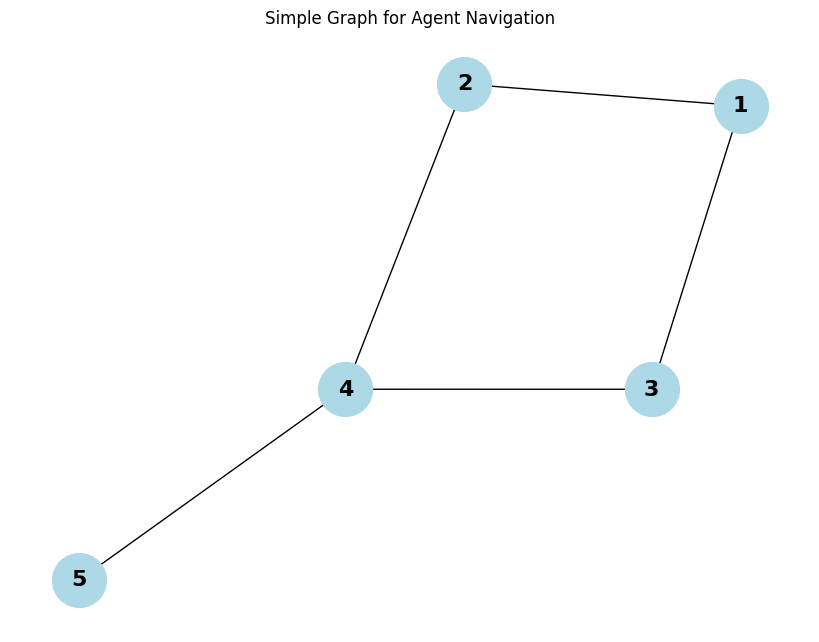

Number of nodes: 5
Number of edges: 5


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4, 5])

G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1500, font_size=16, font_weight='bold')
plt.title("Simple Graph for Agent Navigation")
plt.show()

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

## 2. Graph Traversal - What the Proposer Agent Suggests

The Proposer agent needs to suggest valid paths through the graph. Let's see how NetworkX helps us work with paths.

In [3]:
# Check if there's a path between two nodes
start_node = 1
end_node = 5

if nx.has_path(G, start_node, end_node):
    # Find the shortest path
    path = nx.shortest_path(G, start_node, end_node)
    print(f"Shortest path from {start_node} to {end_node}: {path}")
    print(f"Path length: {len(path) - 1} edges")
else:
    print(f"No path exists between {start_node} and {end_node}")

# Get all neighbors of a node (possible next moves)
current_node = 2
neighbors = list(G.neighbors(current_node))
print(f"\nFrom node {current_node}, the agent can move to: {neighbors}")

Shortest path from 1 to 5: [1, 2, 4, 5]
Path length: 3 edges

From node 2, the agent can move to: [1, 4]


## 3. Graph Properties - Useful for Problem Analysis

NetworkX can compute various graph properties that help understand the problem complexity.

In [ ]:
print(f"Is the graph connected? {nx.is_connected(G)}")

print("\nNode degrees (number of connections):")
for node, degree in G.degree():
    print(f"  Node {node}: {degree} connections")

# Find all simple paths between two nodes
all_paths = list(nx.all_simple_paths(G, source=1, target=5))
print(f"\nAll possible paths from 1 to 5:")
for i, path in enumerate(all_paths, 1):
    print(f"  Path {i}: {path}")

diameter = nx.diameter(G)
print(f"\nGraph diameter: {diameter}")

Is the graph connected? True

Node degrees (number of connections):
  Node 1: 2 connections
  Node 2: 2 connections
  Node 3: 2 connections
  Node 4: 3 connections
  Node 5: 1 connections

All possible paths from 1 to 5:
  Path 1: [1, 2, 4, 5]
  Path 2: [1, 3, 4, 5]

Graph diameter: 3


## 4. Directed Graphs - For More Complex Problems

Some graph problems have directionality (edges go one way). NetworkX handles these with DiGraph.

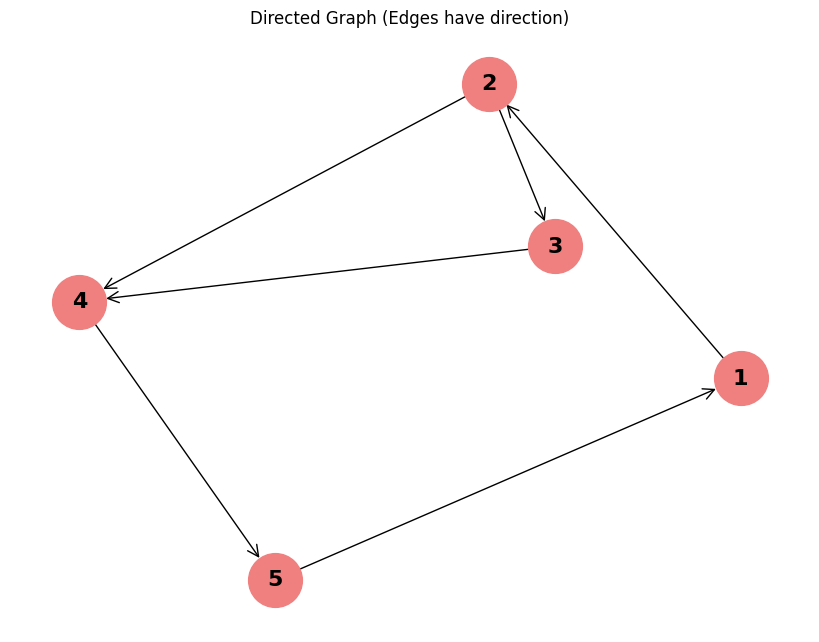

Can move from 1 to 2? True
Can move from 2 to 1? False

Cycle detected: [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)]


In [ ]:
DG = nx.DiGraph()
DG.add_edges_from([(1, 2), (2, 3), (3, 4), (2, 4), (4, 5), (5, 1)])

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(DG)
nx.draw(DG, pos, with_labels=True, node_color='lightcoral',
        node_size=1500, font_size=16, font_weight='bold',
        arrows=True, arrowsize=20, arrowstyle='->')
plt.title("Directed Graph (Edges have direction)")
plt.show()

# In a directed graph, moving from 1->2 is valid, but 2->1 might not be
print(f"Can move from 1 to 2? {DG.has_edge(1, 2)}")
print(f"Can move from 2 to 1? {DG.has_edge(2, 1)}")

try:
    cycle = nx.find_cycle(DG)
    print(f"\nCycle detected: {cycle}")
except nx.NetworkXNoCycle:
    print("\nNo cycles in the graph")